In [3]:
df = pd.read_csv('data/CMCU3M.csv', parse_dates=['Trade Date'], dayfirst=True).rename(
    columns={'Universal Close Price':'Price', 'Trade Date':'Date'})

df_0 = df[df.RIC=='CMCU0'][['Date', 'Price', 'Volume']].rename(
    columns={'Price':'Price0', 'Volume':'Volume0'}).set_index('Date')
df_3 = df[df.RIC=='CMCU3'][['Date', 'Price', 'Volume']].rename(
    columns={'Price':'Price3', 'Volume':'Volume3'}).set_index('Date')
df_s = df[df.RIC=='CMCU0-3'][['Date', 'Price', 'Volume']].rename(
    columns={'Price':'Spread0-3', 'Volume':'Volume0-3'}).set_index('Date')

df = pd.merge(df_0, df_3, left_index=True, right_index=True)
df = pd.merge(df, df_s, left_index=True, right_index=True)
df['Spread'] = df.Price3-df.Price0
df['SpreadGeo'] = df.Price3/df.Price0-1

In [4]:
#df.to_pickle('data/CMCU3M-spread')


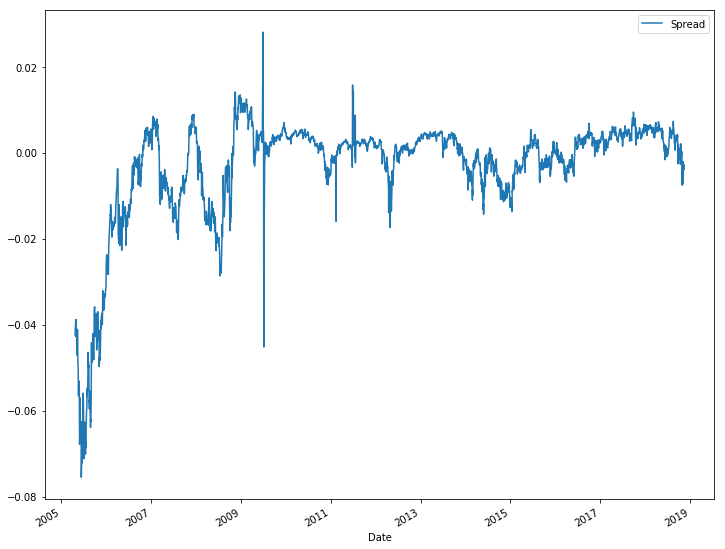